# P5 : Segmentez des clients d'un site e-commerce

## Contexte : 
Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.
    
Votre rôle est d’accompagner Olist dans leur projet de monter une équipe Data et leur premier cas d’usage Data Science autour de la segmentation client.

Vous venez de rejoindre Olist dans un contexte de recrutement intensif afin de monter leur équipe Data. En effet, ils font d’abord appel à des consultants comme vous en renfort sur les sujets les plus critiques en attendant d'internaliser les compétences. Avant de réaliser la segmentation client, on vous attribue une première mission pour aider Fernanda, Lead Data Analyst chez Olist. 


## Mission :

Fournir à l’équipe Marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

## Convention PEP8 (Python Enhancement Proposal 8)¶

**Convention de codage pour le langage de programmation Python:**
- **Indentation:** Utiliser 4 espaces par niveau d'indentation. Les tabulations ne sont pas recommandées.
- **Longueur de ligne:** Chaque ligne de code ne doit pas dépasser 79 caractères.
- **Espaces blancs:** Éviter les espaces blancs inutiles à la fin des lignes ou sur les lignes vides.
- **Importations:** Les modules doivent être importés sur des lignes séparées et ils doivent être placés en haut du fichier.
- **Commentaires:** Ils doivent être complets et compréhensibles. Ils doivent être insérés sur une nouvelle ligne si possible.
- **Nommage des variables:** Les noms des variables doivent être descriptifs, en minuscules, avec des mots séparés par des underscores si nécessaire.

## Analyse exploratoire des données 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### a. Chargement et Inspection des Données

In [3]:
customers = pd.read_csv('customers.csv', sep=",", encoding='latin1')
geolocation = pd.read_csv('geoloc.csv', sep=",", encoding='latin1')
order_items = pd.read_csv('order_items.csv', sep=",", encoding='latin1')
order_payments = pd.read_csv('order_pymts.csv', sep=",", encoding='latin1')
order_reviews = pd.read_csv('order_reviews.csv', sep=",", encoding='latin1')
orders = pd.read_csv('orders.csv', sep=",", encoding='latin1')
products = pd.read_csv('products.csv', sep=",", encoding='latin1')
sellers = pd.read_csv('sellers.csv', sep=",", encoding='latin1')
translation = pd.read_csv('translation.csv', sep=",", encoding='latin1')

In [5]:
# Afficher les données sur customers
customers.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
# Afficher des informations générales sur customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [8]:
# Statistiques descriptives
customers.describe()

,index,customer_zip_code_prefix
count,99441.000000,99441.000000
mean,49720.000000,35137.474583
std,28706.288396,29797.938996
min,0.000000,1003.000000
25%,24860.000000,11347.000000
50%,49720.000000,24416.000000
75%,74580.000000,58900.000000
max,99440.000000,99990.000000


In [9]:
orders

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
orders.columns

Index(['index', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

### b. Analyse des Variables Clés

Historique des commandes : Analyser la fréquence des commandes, les valeurs monétaires, et les retards de livraison.

Produits achetés : Examiner les catégories de produits et les volumes achetés.

Commentaires de satisfaction : Analyser les scores de reviews et les commentaires associés.

Localisation : Analyser la répartition géographique des clients.

In [18]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])

# Calculer les délais de livraison
orders['delay_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

In [20]:
# Afficher les dates des commandes
orders['order_purchase_timestamp']

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [22]:
# Afficher les dates de livraison des commandes
orders['order_delivered_customer_date']

0       2017-10-10 21:25:13
1       2018-08-07 15:27:45
2       2018-08-17 18:06:29
3       2017-12-02 00:28:42
4       2018-02-16 18:17:02
                ...        
99436   2017-03-17 15:08:01
99437   2018-02-28 17:37:56
99438   2017-09-21 11:24:17
99439   2018-01-25 23:32:54
99440   2018-03-16 13:08:30
Name: order_delivered_customer_date, Length: 99441, dtype: datetime64[ns]

In [24]:
# Afficher les dates estimés pour la livraison des commandes
orders['order_estimated_delivery_date']

0       2017-10-18
1       2018-08-13
2       2018-09-04
3       2017-12-15
4       2018-02-26
           ...    
99436   2017-03-28
99437   2018-03-02
99438   2017-09-27
99439   2018-02-15
99440   2018-04-03
Name: order_estimated_delivery_date, Length: 99441, dtype: datetime64[ns]

In [26]:
# Date de création de review
order_reviews['review_creation_date']

0       2018-01-18
1       2018-03-10
2       2018-02-17
3       2017-04-21
4       2018-03-01
           ...    
99219   2018-07-07
99220   2017-12-09
99221   2018-03-22
99222   2018-07-01
99223   2017-07-03
Name: review_creation_date, Length: 99224, dtype: datetime64[ns]

In [28]:
# Afficher les délais de livraison
orders['delay_days'] 

0        -8.0
1        -6.0
2       -18.0
3       -13.0
4       -10.0
         ... 
99436   -11.0
99437    -2.0
99438    -6.0
99439   -21.0
99440   -18.0
Name: delay_days, Length: 99441, dtype: float64

In [30]:
orders.isnull().sum()

index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delay_days                       2965
dtype: int64

In [32]:
orders.duplicated().sum()

0

In [34]:
# Fréquence des commandes par client
orders_per_customer = orders.groupby('customer_id')['order_id'].count()
orders_per_customer.name = 'order_count'
orders_per_customer

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    1
ffffe8b65bbe3087b653a978c870db99    1
Name: order_count, Length: 99441, dtype: int64

In [36]:
order_payments

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [38]:
order_payments.columns

Index(['index', 'order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [40]:
# Analyse des produits vendus
product_sales = order_items.groupby('product_id')['price'].sum()
product_sales.name = 'total_sales'
product_sales

product_id
00066f42aeeb9f3007548bb9d3f33c38    101.65
00088930e925c41fd95ebfe695fd2655    129.90
0009406fd7479715e4bef61dd91f2462    229.00
000b8f95fcb9e0096488278317764d19    117.80
000d9be29b5207b54e86aa1b1ac54872    199.00
                                     ...  
fff6177642830a9a94a0f2cba5e476d1    229.98
fff81cc3158d2725c0655ab9ba0f712c     90.00
fff9553ac224cec9d15d49f5a263411f     32.00
fffdb2d0ec8d6a61f0a0a0db3f25b441    169.95
fffe9eeff12fcbd74a2f2b007dde0c58    249.99
Name: total_sales, Length: 32951, dtype: float64

In [42]:
# Analyse par catégorie de produit
product_categories = products.groupby('product_category_name')['product_id'].count()
product_categories.name = 'product_count'
product_categories

product_category_name
agro_industria_e_comercio      74
alimentos                      82
alimentos_bebidas             104
artes                          55
artes_e_artesanato             19
                             ... 
sinalizacao_e_seguranca        93
tablets_impressao_imagem        9
telefonia                    1134
telefonia_fixa                116
utilidades_domesticas        2335
Name: product_count, Length: 73, dtype: int64

In [44]:
# Analyse de la satisfaction client 
review_scores = order_reviews.groupby('order_id')['review_score'].mean()
review_scores.name = 'avg_review_score'
review_scores

order_id
00010242fe8c5a6d1ba2dd792cb16214    5.0
00018f77f2f0320c557190d7a144bdd3    4.0
000229ec398224ef6ca0657da4fc703e    5.0
00024acbcdf0a6daa1e931b038114c75    4.0
00042b26cf59d7ce69dfabb4e55b4fd9    5.0
                                   ... 
fffc94f6ce00a00581880bf54a75a037    5.0
fffcd46ef2263f404302a634eb57f7eb    5.0
fffce4705a9662cd70adb13d4a31832d    5.0
fffe18544ffabc95dfada21779c9644f    5.0
fffe41c64501cc87c801fd61db3f6244    5.0
Name: avg_review_score, Length: 98673, dtype: float64

C:\Users\SOUKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


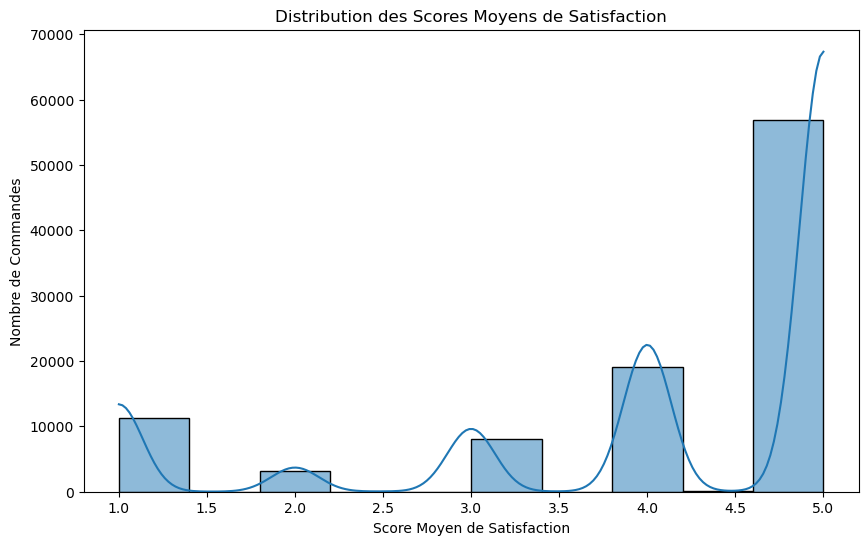

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que review_scores est une série pandas
review_scores = order_reviews.groupby('order_id')['review_score'].mean()
review_scores.name = 'avg_review_score'

# Créer un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(review_scores, bins=10, kde=True)
plt.title('Distribution des Scores Moyens de Satisfaction')
plt.xlabel('Score Moyen de Satisfaction')
plt.ylabel('Nombre de Commandes')
plt.show()

In [47]:
# Performance des vendeurs
seller_performance = order_items.groupby('seller_id')['price'].sum()
seller_performance.name = 'total_sales'
seller_performance

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     2685.00
001cca7ae9ae17fb1caed9dfb1094831    25080.03
001e6ad469a905060d959994f1b41e4f      250.00
002100f778ceb8431b7a1020ff7ab48f     1234.50
003554e2dce176b5555353e4f3555ac8      120.00
                                      ...   
ffcfefa19b08742c5d315f2791395ee5       69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3     2101.20
ffeee66ac5d5a62fe688b9d26f83f534     1839.86
fffd5413c0700ac820c7069d66d98c89     9062.30
ffff564a4f9085cd26170f4732393726     1426.30
Name: total_sales, Length: 3095, dtype: float64

In [48]:
# Standardisation des catégories de produits
# Fusionner avec les produits pour ajouter les noms de catégories en anglais
products = products.merge(translation, on='product_category_name', how='left')
products

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,product_category_name_english
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,6.0,perfumery
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,46.0,art
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,5.0,sports_leisure
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,11.0,baby
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,7.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,4.0,furniture_decor
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,43.0,construction_tools_lights
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,3.0,bed_bath_table
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,1.0,computers_accessories


In [52]:
orders.columns

Index(['index', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delay_days'],
      dtype='object')

In [54]:
sellers.columns

Index(['index', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [56]:
order_reviews.columns

Index(['index', 'review_id', 'order_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [58]:
### Analyser les performances des vendeurs

In [60]:
# Conversion des colonnes en datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

In [62]:
# Calculer delay_days
orders['delay_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

In [64]:
print(orders.dtypes)

index                                     int64
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
delay_days                              float64
dtype: object


In [66]:
# tableau de bord des performances des vendeurs
# Fusionner les tables nécessaires
merged_data = (order_items.merge(orders[['order_id', 'delay_days']], on='order_id', how='left')
                          .merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')
                          .merge(sellers, on='seller_id', how='left'))

# Tableau de bord des performances des vendeurs
seller_performance = merged_data.groupby('seller_id').agg({
    'price': 'sum',           # Total des ventes
    'review_score': 'mean',   # Score moyen des avis
    'delay_days': 'mean'      # Délai moyen de livraison
})

print(seller_performance)



                                     price  review_score  delay_days
seller_id                                                           
0015a82c2db000af6aaaf3ae2ecb0532   2685.00      3.666667  -16.333333
001cca7ae9ae17fb1caed9dfb1094831  25080.03      3.902542  -13.213675
001e6ad469a905060d959994f1b41e4f    250.00      1.000000         NaN
002100f778ceb8431b7a1020ff7ab48f   1254.40      3.982143   -8.218182
003554e2dce176b5555353e4f3555ac8    120.00      5.000000  -27.000000
...                                    ...           ...         ...
ffcfefa19b08742c5d315f2791395ee5     69.90      1.000000         NaN
ffdd9f82b9a447f6f8d4b91554cc7dd3   2101.20      4.250000  -12.200000
ffeee66ac5d5a62fe688b9d26f83f534   1839.86      4.214286   -8.357143
fffd5413c0700ac820c7069d66d98c89   9062.30      3.866667  -11.327586
ffff564a4f9085cd26170f4732393726   1426.30      2.100000  -48.000000

[3095 rows x 3 columns]


In [67]:
geolocation.columns

Index(['index', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

# Assurez-vous que les colonnes de code postal sont des chaînes pour la fusion
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(str)
geolocation['geolocation_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix'].astype(str)

In [95]:
# Fusionner les informations de localisation
customer_geo = customers.merge(
    geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']],
    left_on='customer_zip_code_prefix', 
    right_on='geolocation_zip_code_prefix', 
    how='left'
)


In [110]:
# Analyser la répartition géographique par état
geo_distribution_state = customer_geo['geolocation_state'].value_counts()
print(geo_distribution_state)

geolocation_state
SP    5620430
RJ    3015690
MG    2878728
RS     805370
PR     626021
SC     538638
BA     365875
ES     316654
GO     133146
MT     122395
PE     114588
DF      93309
PA      83554
CE      63507
MS      61473
MA      53383
AL      34861
PB      27714
SE      24584
PI      23913
RO      21244
RN      20595
TO      17509
AC       7688
AM       5587
AP       4912
RR       2087
Name: count, dtype: int64


In [112]:
# Analyser la répartition géographique par ville
geo_distribution_city = customer_geo['geolocation_city'].value_counts()
print(geo_distribution_city)

geolocation_city
rio de janeiro         1913913
sao paulo              1164470
belo horizonte          737556
niteroi                 393175
curitiba                255731
                        ...   
água preta                   1
sampaio correia              1
antônio gonçalves            1
claro dos poções             1
jardim abc de goias          1
Name: count, Length: 5812, dtype: int64


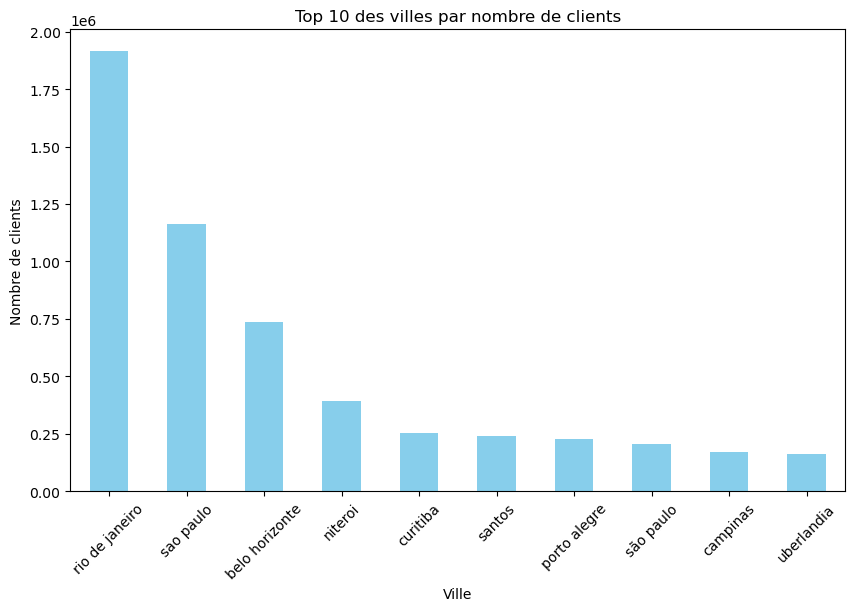

In [118]:
import matplotlib.pyplot as plt

# Prendre les 10 premières villes avec le plus grand nombre de clients
top_cities = geo_distribution_city.head(10)

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 des villes par nombre de clients')
plt.xlabel('Ville')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)

# Enregistrer la figure sous format d'image (par exemple, PNG)
plt.savefig('top_10_cities.png', bbox_inches='tight')

# Afficher la figure
plt.show()


In [ ]:
import folium

# Filtrer les lignes avec des valeurs NaN dans les colonnes de latitude ou de longitude
customer_geo_filtered = customer_geo.dropna(subset=['geolocation_lat', 'geolocation_lng'])

# Calculer la répartition des clients par ville
city_distribution = customer_geo_filtered['geolocation_city'].value_counts()

# Créer une carte de base centrée sur le Brésil
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Ajouter des points pour chaque ville avec le nombre de clients
for index, row in customer_geo_filtered.iterrows():
    city_name = row['geolocation_city']
    num_customers = city_distribution.get(city_name, 0)
    
    folium.CircleMarker(location=[row['geolocation_lat'], row['geolocation_lng']],
                        radius=num_customers * 0.05,  # Ajuster la taille en fonction du nombre de clients
                        color='blue',
                        fill=True,
                        fill_opacity=0.6).add_to(m)

# Sauvegarder la carte en HTML
m.save('customer_distribution_map.html')

# Afficher la carte (si vous utilisez un Jupyter Notebook)
m

In [ ]:
# Visualisation : Carte des clients
# Créer une carte centrée sur une latitude et longitude générales
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Ajouter des points sur la carte pour chaque client
for _, row in customer_geo.dropna(subset=['geolocation_lat', 'geolocation_lng']).iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=f"City: {row['geolocation_city']}, State: {row['geolocation_state']}"
    ).add_to(m)

# Enregistrer la carte en tant que fichier HTML
m.save('customer_distribution.html')

In [24]:
# Analyser la Répartition Géographique des Clients

# Jointure des tables sur le préfixe du code postal
customers_geo = pd.merge(customers, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Afficher les premières lignes pour vérifier la jointure
print(customers_geo.head())

   index_x                       customer_id  \
0        0  06b8999e2fba1a1fbc88172c00ba8bc7   
1        0  06b8999e2fba1a1fbc88172c00ba8bc7   
2        0  06b8999e2fba1a1fbc88172c00ba8bc7   
3        0  06b8999e2fba1a1fbc88172c00ba8bc7   
4        0  06b8999e2fba1a1fbc88172c00ba8bc7   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  861eff4711a542e4b93843c6dd7febb0                     14409        franca   
1  861eff4711a542e4b93843c6dd7febb0                     14409        franca   
2  861eff4711a542e4b93843c6dd7febb0                     14409        franca   
3  861eff4711a542e4b93843c6dd7febb0                     14409        franca   
4  861eff4711a542e4b93843c6dd7febb0                     14409        franca   

  customer_state   index_y  geolocation_zip_code_prefix  geolocation_lat  \
0             SP  334422.0                      14409.0       -20.509898   
1             SP  334449.0                      14409.0       -20.497396   
2       

In [25]:
# Nombre de Clients par Ville
city_distribution = customers_geo['geolocation_city'].value_counts().reset_index()
city_distribution.columns = ['city', 'number_of_customers']

print(city_distribution.head())

             city  number_of_customers
0  rio de janeiro              1913913
1       sao paulo              1164470
2  belo horizonte               737556
3         niteroi               393175
4        curitiba               255731


In [26]:
# Nombre de Clients par État
state_distribution = customers_geo['geolocation_state'].value_counts().reset_index()
state_distribution.columns = ['state', 'number_of_customers']

print(state_distribution.head())

  state  number_of_customers
0    SP              5620430
1    RJ              3015690
2    MG              2878728
3    RS               805370
4    PR               626021


In [27]:
# Visualisation de la Répartition Géographique
# Filtrer les Lignes avec des Coordonnées Manquantes

# Filtrer les lignes où les coordonnées géographiques sont manquantes
customers_geo_cleaned = customers_geo.dropna(subset=['geolocation_lat', 'geolocation_lng'])

# Vérifier qu'il n'y a plus de NaN
print(customers_geo_cleaned.isnull().sum())

index_x                        0
customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
index_y                        0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [ ]:
!pip install --upgrade folium

In [ ]:
import folium
from folium.plugins import FastMarkerCluster

# Calculer la position moyenne des clients après nettoyage
avg_lat = customers_geo_cleaned['geolocation_lat'].mean()
avg_lng = customers_geo_cleaned['geolocation_lng'].mean()

# Créer une carte centrée sur les coordonnées moyennes
map_customers = folium.Map(location=[avg_lat, avg_lng], zoom_start=5)

# Préparer les coordonnées pour FastMarkerCluster
locations = customers_geo_cleaned[['geolocation_lat', 'geolocation_lng']].values.tolist()

# Ajouter les points à la carte en utilisant FastMarkerCluster
FastMarkerCluster(locations).add_to(map_customers)

# Afficher la carte
map_customers

In [ ]:
from IPython.display import display

# Afficher la carte
display(map_customers)

In [ ]:
from IPython.display import IFrame

# Sauvegarder la carte dans un fichier HTML temporaire
map_customers.save('map_customers.html')

# Utiliser IFrame pour afficher la carte
IFrame('map_customers.html', width=700, height=450)

### b. Création de Variables de Clustering
Récupérer des variables pertinentes : Créer des variables de comportement client telles que le montant total dépensé, la fréquence des achats, et le score moyen des reviews.

In [29]:
customer_order_summary = orders.groupby('customer_id').agg({
    'order_id': 'count',
    'delay_days': 'mean',
    'order_purchase_timestamp': 'max'
}).reset_index()

customer_order_summary.rename(columns={'order_id': 'order_count'}, inplace=True)

In [31]:
orders['order_id']

0        e481f51cbdc54678b7cc49136f2d6af7
1        53cdb2fc8bc7dce0b6741e2150273451
2        47770eb9100c2d0c44946d9cf07ec65d
3        949d5b44dbf5de918fe9c16f97b45f8a
4        ad21c59c0840e6cb83a9ceb5573f8159
                       ...               
99436    9c5dedf39a927c1b2549525ed64a053c
99437    63943bddc261676b46f01ca7ac2f7bd8
99438    83c1379a015df1e13d02aae0204711ab
99439    11c177c8e97725db2631073c19f07b62
99440    66dea50a8b16d9b4dee7af250b4be1a5
Name: order_id, Length: 99441, dtype: object

In [33]:
orders.columns

Index(['index', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delay_days'],
      dtype='object')

In [35]:
customer_order_summary

,customer_id,order_count,delay_days,order_purchase_timestamp
0,00012a2ce6f8dcda20d059ce98491703,1,-6.0,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,1,-10.0,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,1,-16.0,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,1,-1.0,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,1,-5.0,2018-04-02 13:42:17
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,-17.0,2018-03-29 16:59:26
99437,fffeda5b6d849fbd39689bb92087f431,1,-21.0,2018-05-22 13:36:02
99438,ffff42319e9b2d713724ae527742af25,1,-7.0,2018-06-13 16:57:05
99439,ffffa3172527f765de70084a7e53aae8,1,-12.0,2017-09-02 11:53:32


In [37]:
sellers

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [39]:
sellers['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

## Étape 1: Répondez aux requêtes SQL

### Requête 1 : Commandes récentes de moins de 3 mois reçues avec au moins 3 jours de retard

In [44]:
from datetime import datetime, timedelta

# Convertir les colonnes de dates en datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Filtrer les commandes des 3 derniers mois
three_months_ago = np.max(orders['order_purchase_timestamp']) - timedelta(days=90)
recent_orders = orders[(orders['order_status'] != 'canceled') & 
                       (orders['order_purchase_timestamp'] >= three_months_ago)]

# Filtrer les commandes avec au moins 3 jours de retard
delayed_orders = recent_orders[(recent_orders['order_delivered_customer_date'] - 
                                recent_orders['order_estimated_delivery_date']).dt.days >= 3]

delayed_orders_result = delayed_orders[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
delayed_orders_result

,order_id,order_delivered_customer_date,order_estimated_delivery_date
561,cfa4fa27b417971e86d8127cb688712f,2018-08-29 01:41:41,2018-08-22
711,234c056c50619f48da64f731c48242b4,2018-09-01 18:14:42,2018-08-23
1844,7f579e203c931f3e8410103359c6d523,2018-08-13 20:11:47,2018-08-09
1967,cb6e441ff2ef574ce08d3709426f88ec,2018-08-18 01:11:58,2018-08-15
2349,03720fdc92032ee4abd471d172006ab0,2018-08-21 00:11:52,2018-08-17
...,...,...,...
98248,f6ac44bbece0129b596dfc21aede3c20,2018-08-21 18:07:43,2018-08-14
98368,874a7690bc049bd4ce210d195bdfff7b,2018-08-13 15:50:48,2018-08-08
98382,587e32dd528769d669d539531d32aeb5,2018-09-03 09:32:31,2018-08-28
98564,3adb141ba4bd69dd7fe8d3fb733c6b74,2018-08-28 18:02:52,2018-08-24


In [46]:
orders

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_days
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8.0
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6.0
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18.0
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13.0
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10.0
...,...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-11.0
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,-2.0
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,-6.0
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,-21.0


In [48]:
np.max(orders['order_purchase_timestamp'])

Timestamp('2018-10-17 17:30:18')

In [50]:
recent_orders = orders[(orders['order_purchase_timestamp'] >= three_months_ago)]

In [52]:
three_months_ago

Timestamp('2018-07-19 17:30:18')

In [54]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          99441 non-null  int64         
 1   order_id                       99441 non-null  object        
 2   customer_id                    99441 non-null  object        
 3   order_status                   99441 non-null  object        
 4   order_purchase_timestamp       99441 non-null  datetime64[ns]
 5   order_approved_at              99281 non-null  object        
 6   order_delivered_carrier_date   97658 non-null  object        
 7   order_delivered_customer_date  96476 non-null  datetime64[ns]
 8   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 9   delay_days                     96476 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 7.6+ MB


In [56]:
orders.describe()

,index,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,delay_days
count,99441.000000,99441,96476,99441,96476.000000
mean,49720.000000,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,-11.876881
min,0.000000,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-09-30 00:00:00,-147.000000
25%,24860.000000,2017-09-12 14:46:19,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,-17.000000
50%,49720.000000,2018-01-18 23:04:36,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,-12.000000
75%,74580.000000,2018-05-04 15:42:16,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,-7.000000
max,99440.000000,2018-10-17 17:30:18,2018-10-17 13:22:46,2018-11-12 00:00:00,188.000000
std,28706.288396,NaN,NaN,NaN,10.183854


### Requête 2 : Vendeurs ayant généré un chiffre d'affaires de plus de 100 000 Real sur des commandes livrées via Olist

In [59]:
# Filtrer les commandes livrées
delivered_orders = orders[orders['order_status'] == 'delivered']

# Joindre avec order_items pour obtenir les prix et seller_id
delivered_order_items = order_items[order_items['order_id'].isin(delivered_orders['order_id'])]

# Calculer le chiffre d'affaires par vendeur
seller_revenue = delivered_order_items.groupby('seller_id')['price'].sum().reset_index()
seller_revenue = seller_revenue[seller_revenue['price'] > 100000]

# Joindre avec sellers pour obtenir les noms des vendeurs
seller_revenue = seller_revenue.merge(sellers, on='seller_id')
seller_revenue_result = seller_revenue[['seller_id', 'price']]
seller_revenue_result

,seller_id,price
0,1025f0e2d44d7041d6cf58b6550e0bfa,138208.56
1,1f50f920176fa81dab994f9023523100,106655.71
2,46dc3b2cc0980fb8ec44634e21d2718e,122811.38
3,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93
4,4a3ca9315b744ce9f8e9374361493884,196882.12
5,53243585a1d6dc2643021fd1853d8905,217940.44
6,5dceca129747e92ff8ef7a997dc4f8ca,111126.73
7,620c87c171fb2a6dd6e8bb4dec959fc6,112461.50
8,6560211a19b47992c3666cc44a7e94c0,120702.83
9,7a67c85e85bb2ce8582c35f2203ad736,139658.69


In [61]:
sellers

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Requête 3 : Nouveaux vendeurs de moins de 3 mois d'ancienneté ayant vendu plus de 30 produits

Là, on va essayer de trouver un lien avec les commandes (table orders) pour obtenir une estimation de la date d'inscription des vendeurs en utilisant la première date de commande. Voici comment procéder :



#### Étape 1 : Obtenir la Première Date de Commande pour Chaque Vendeur
Nous allons utiliser la table order_items et orders pour obtenir la première date de commande pour chaque vendeur. Cette date peut être utilisée comme une approximation de la date d'inscription du vendeur.

In [66]:
# Convertir les colonnes de dates en datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Joindre order_items avec orders pour obtenir les dates de commande pour chaque vendeur
order_items_with_dates = order_items.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id')

# Obtenir la première date de commande pour chaque vendeur
first_order_dates = order_items_with_dates.groupby('seller_id')['order_purchase_timestamp'].min().reset_index()
first_order_dates.columns = ['seller_id', 'seller_since']

# Joindre cette information avec le DataFrame sellers
sellers = sellers.merge(first_order_dates, on='seller_id')

# Vérifier les premières lignes pour s'assurer que cela fonctionne
sellers

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_since
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,2017-05-05 16:12:29
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,2017-03-28 09:00:00
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,2018-07-30 12:20:10
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,2018-08-03 00:26:04
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,2017-11-14 12:04:09
...,...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,2018-07-13 14:29:51
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,2017-06-17 15:21:29
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,2018-04-05 16:56:38
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,2017-02-07 11:32:53


#### Étape 2 : Filtrer les Nouveaux Vendeurs et Calculer les Ventes
Maintenant que nous avons une colonne seller_since approximée, nous pouvons continuer avec la requête pour obtenir les nouveaux vendeurs ayant vendu plus de 30 produits.

In [69]:
from datetime import datetime, timedelta

# Déterminer la date de trois mois en arrière
three_months_ago =  np.max(orders['order_purchase_timestamp']) - timedelta(days=90)

# Filtrer les nouveaux vendeurs
new_sellers = sellers[sellers['seller_since'] >= three_months_ago]

# Compter les ventes par vendeur
seller_sales = order_items.groupby('seller_id')['order_id'].count().reset_index()
seller_sales.columns = ['seller_id', 'total_sales']

# Joindre avec new_sellers pour obtenir les nouveaux vendeurs avec plus de 30 ventes
new_seller_sales = new_sellers.merge(seller_sales, on='seller_id')
engaged_new_sellers = new_seller_sales[new_seller_sales['total_sales'] > 30]

# Afficher le résultat
engaged_new_sellers_result = engaged_new_sellers[['seller_id', 'total_sales']]
engaged_new_sellers_result

,seller_id,total_sales
140,d13e50eaa47b4cbe9eb81465865d8cfc,69
230,81f89e42267213cb94da7ddc301651da,52


In [72]:
print(sellers.columns)

Index(['index', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'seller_since'],
      dtype='object')


### Requête 4 : Les 5 codes postaux avec plus de 30 reviews et le pire score moyen sur les 12 derniers mois

In [75]:
# Convertir les colonnes de dates en datetime
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])

# Filtrer les reviews des 12 derniers mois
one_year_ago = np.max(orders['order_purchase_timestamp']) - timedelta(days=365)
recent_reviews = order_reviews[order_reviews['review_creation_date'] >= one_year_ago]

# Joindre avec orders pour obtenir customer_id
reviews_with_orders = recent_reviews.merge(orders, on='order_id')

# Joindre avec customers pour obtenir les codes postaux
reviews_with_customers = reviews_with_orders.merge(customers, on='customer_id')

# Grouper par code postal et calculer les scores moyens
zipcode_reviews = reviews_with_customers.groupby('customer_zip_code_prefix')['review_score'].agg(['count', 'mean']).reset_index()
zipcode_reviews.columns = ['customer_zip_code_prefix', 'review_count', 'avg_review_score']

# Filtrer les codes postaux avec plus de 30 reviews
zipcode_reviews = zipcode_reviews[zipcode_reviews['review_count'] > 30]

# Trier par score moyen et prendre les 5 pires
worst_zipcodes = zipcode_reviews.sort_values('avg_review_score').head(5)

worst_zipcodes_result = worst_zipcodes[['customer_zip_code_prefix', 'review_count', 'avg_review_score']]
worst_zipcodes_result

,customer_zip_code_prefix,review_count,avg_review_score
5564,22753,47,2.808511
5569,22770,37,3.135135
5577,22793,93,3.247312
4078,13056,31,3.290323
4206,13295,32,3.312500


In [77]:
order_reviews

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...,...
99219,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


## Étape 2 : Créez un fichier par client

Pour cette étape, nous allons créer un fichier par client en utilisant à la fois SQL et Python pour réaliser le feature engineering. Nous nous concentrerons sur la méthode RFM (Récence, Fréquence, Montant) pour le ciblage marketing.

### Préparation des données avec SQL

Nous allons commencer par des requêtes exploratoires pour comprendre et extraire les données nécessaires pour chaque client.

Requêtes SQL pour extraire les données nécessaires :

Voici quelques exemples de requêtes SQL que nous pourrions utiliser pour extraire les informations RFM (Récence, Fréquence, Montant) des clients :

Récence (Recency) : Nombre de jours depuis la dernière commande de chaque client.

Fréquence (Frequency) : Nombre total de commandes passées par chaque client.

Montant (Monetary) : Montant total dépensé par chaque client.

Récupérer les informations de commande des clients

In [5]:
import sqlite3
import pandas as pd

In [7]:
# Connexion à la base de données SQLite
conn = sqlite3.connect(r'C:\Users\SOUKA\Desktop\Projet5_SCSC\olist.db') 

In [9]:
# Affiche la liste des tables dans la base de données
tables_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables_df)

            name
0      customers
1         geoloc
2    order_items
3    order_pymts
4  order_reviews
5         orders
6       products
7        sellers
8    translation


In [11]:
# Exemple de requête pour récupérer les données
query = "SELECT * FROM customers;"
customers_df = pd.read_sql_query(query, conn)

In [13]:
# Affichage des premières lignes du DataFrame
print(customers_df.head())

   index                       customer_id                customer_unique_id  \
0      0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


### Exécution des Requêtes SQL

Une fois connecté à la base de données, nous pouvons exécuter des requêtes SQL pour récupérer les données nécessaires. 

Par exemple :



In [15]:
# Récupérer les informations de commandes :
query = """
SELECT customer_id, order_id, order_purchase_timestamp
FROM orders
WHERE order_status = 'delivered';
"""
orders_df = pd.read_sql_query(query, conn)
orders_df

,customer_id,order_id,order_purchase_timestamp
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39
...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05
96474,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58
96475,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43
96476,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27


In [17]:
# Récupérer les informations de satisfaction client :

query = """
SELECT order_id, AVG(review_score) AS average_review_score
FROM order_reviews
GROUP BY order_id;
"""
reviews_df = pd.read_sql_query(query, conn)
reviews_df

,order_id,average_review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,5.0
98670,fffce4705a9662cd70adb13d4a31832d,5.0
98671,fffe18544ffabc95dfada21779c9644f,5.0


### Manipulation des Données dans Pandas
Après avoir récupéré les données sous forme de DataFrame, nous pouvons les manipuler en utilisant pandas pour effectuer le feature engineering. 

Par exemple :

### Calculer les Features RFM
Calculer la récence (Recency) : Calculons le nombre de jours depuis la dernière commande de chaque client.

In [19]:
# Calcul de la récence pour chaque client

# Convertir les colonnes de dates en datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Trouver la date maximale dans vos données
latest_date = orders['order_purchase_timestamp'].max()

# Calculer la récence en jours par rapport à cette date
orders['recency'] = (latest_date - orders['order_purchase_timestamp']).dt.days

# Regrouper les données par client
customer_recency = orders.groupby('customer_id').agg({
    'order_id': 'count',
    'recency': 'min'
}).reset_index()

print(customer_recency.head())

                        customer_id  order_id  recency
0  00012a2ce6f8dcda20d059ce98491703         1      337
1  000161a058600d5901f007fab4c27140         1      458
2  0001fd6190edaaf884bcaf3d49edf079         1      596
3  0002414f95344307404f0ace7a26f1d5         1      427
4  000379cdec625522490c315e70c7a9fb         1      198


In [8]:
latest_date

Timestamp('2018-10-17 17:30:18')

### Sauvegarde des Résultats
Nous pouvons sauvegarder les résultats dans un fichier CSV ou les écrire dans une autre table de la base de données si nécessaire :

In [21]:
# Sauvegarder le DataFrame dans un fichier CSV
customer_recency.to_csv('customer_recency.csv', index=False)

### Récupérer les résultats de la requête RFM (Récence, Fréquence, Monétaire) exécutée en SQL et les enregistrer dans un fichier CSV

In [23]:
# Requête SQL pour calculer les valeurs RFM
query = """
WITH max_date AS (
    SELECT MAX(order_purchase_timestamp) AS max_order_date
    FROM orders
)

SELECT
    o.customer_id,
    JULIANDAY(max_date.max_order_date) - JULIANDAY(MAX(o.order_purchase_timestamp)) AS recency,
    COUNT(o.order_id) AS frequency,
    SUM(oi.price) AS monetary
FROM
    orders o
JOIN
    order_items oi ON o.order_id = oi.order_id
JOIN
    max_date
WHERE
    o.order_status = 'delivered'
GROUP BY
    o.customer_id;
"""

# Exécution de la requête et récupération des résultats dans un DataFrame
rfm_df = pd.read_sql_query(query, conn)

# Affichage des premières lignes du DataFrame pour vérification
print(rfm_df.head())

                        customer_id     recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703  337.056852          1     89.80
1  000161a058600d5901f007fab4c27140  458.326227          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079  596.266377          1    179.99
3  0002414f95344307404f0ace7a26f1d5  427.181227          1    149.90
4  000379cdec625522490c315e70c7a9fb  198.158345          1     93.00


In [25]:
# Enregistrement des résultats dans un fichier CSV
rfm_df.to_csv('rfm_results.csv', index=False)

### Chargement des Données RFM

In [27]:
# Chargement des résultats RFM depuis un fichier CSV
rfm_df = pd.read_csv('rfm_results.csv')

# Vérification des données
print(rfm_df.head())

                        customer_id     recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703  337.056852          1     89.80
1  000161a058600d5901f007fab4c27140  458.326227          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079  596.266377          1    179.99
3  0002414f95344307404f0ace7a26f1d5  427.181227          1    149.90
4  000379cdec625522490c315e70c7a9fb  198.158345          1     93.00


In [29]:
# Sélection des colonnes RFM
rfm_features = rfm_df[['recency', 'frequency', 'monetary']]
rfm_features

,recency,frequency,monetary
0,337.056852,1,89.80
1,458.326227,1,54.90
2,596.266377,1,179.99
3,427.181227,1,149.90
4,198.158345,1,93.00
...,...,...,...
96473,214.690868,1,78.00
96474,202.021435,1,54.90
96475,148.162685,1,47.90
96476,126.023067,1,199.90


In [37]:
# Ajouter la variable 'review_score'
# Requête SQL pour calculer les valeurs RFM avec la moyenne des review_score
query = """
WITH max_date AS (
    SELECT MAX(order_purchase_timestamp) AS max_order_date
    FROM orders
)

SELECT
    o.customer_id,
    JULIANDAY(max_date.max_order_date) - JULIANDAY(MAX(o.order_purchase_timestamp)) AS recency,
    COUNT(o.order_id) AS frequency,
    SUM(oi.price) AS monetary,
    AVG(r.review_score) AS average_review_score
FROM
    orders o
JOIN
    order_items oi ON o.order_id = oi.order_id
JOIN
    order_reviews r ON o.order_id = r.order_id
JOIN
    max_date
WHERE
    o.order_status = 'delivered'
GROUP BY
    o.customer_id;
"""

# Exécution de la requête et récupération des résultats dans un DataFrame
rfm_review_df = pd.read_sql_query(query, conn)

# Affichage des premières lignes du DataFrame pour vérification
print(rfm_review_df.head())


                        customer_id     recency  frequency  monetary  \
0  00012a2ce6f8dcda20d059ce98491703  337.056852          1     89.80   
1  000161a058600d5901f007fab4c27140  458.326227          1     54.90   
2  0001fd6190edaaf884bcaf3d49edf079  596.266377          1    179.99   
3  0002414f95344307404f0ace7a26f1d5  427.181227          1    149.90   
4  000379cdec625522490c315e70c7a9fb  198.158345          1     93.00   

   average_review_score  
0                   1.0  
1                   4.0  
2                   5.0  
3                   5.0  
4                   4.0  


In [39]:
# Enregistrement des résultats dans un fichier CSV
rfm_review_df.to_csv('rfm_review.csv', index=False)

### Normalisation des Données

La normalisation des variables RFM (Récence, Fréquence, Monétaire) est une étape cruciale avant d'appliquer un algorithme de clustering. La normalisation permet de mettre les différentes variables sur une échelle commune, ce qui empêche une variable avec une plus grande échelle de dominer les autres dans l'analyse.

In [117]:
# Normalisation avec StandardScaler : Centre les données autour de 0 avec un écart-type de 1.

from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# Ajustement et transformation des données RFM
rfm_standardized = scaler.fit_transform(rfm_features)

# Création d'un nouveau DataFrame pour les données standardisées
rfm_standardized_df = pd.DataFrame(rfm_standardized, columns=['recency_standardized', 'frequency_standardized', 'monetary_standardized'])

# Ajout de l'identifiant client au DataFrame standardisé
rfm_standardized_df['customer_id'] = rfm_df['customer_id']

# Affichage des premières lignes du DataFrame standardisé
print(rfm_standardized_df.head())

   recency_standardized  frequency_standardized  monetary_standardized  \
0              0.316063               -0.263916              -0.225989   
1              1.109514               -0.263916              -0.392939   
2              2.012041               -0.263916               0.205451   
3              0.905736               -0.263916               0.061511   
4             -0.592734               -0.263916              -0.210681   

                        customer_id  
0  00012a2ce6f8dcda20d059ce98491703  
1  000161a058600d5901f007fab4c27140  
2  0001fd6190edaaf884bcaf3d49edf079  
3  0002414f95344307404f0ace7a26f1d5  
4  000379cdec625522490c315e70c7a9fb  


In [118]:
# Sauvegarde des résultats standardisés dans un fichier CSV
rfm_standardized_df.to_csv('rfm_standardized_results.csv', index=False)
print("Les résultats standardisés RFM ont été enregistrés dans 'rfm_standardized_results.csv'.")

Les résultats standardisés RFM ont été enregistrés dans 'rfm_standardized_results.csv'.


 ** Conclusion **
******

Nous avons effectué les étapes suivantes :

Chargé et exploré les données.

Calculé les features RFM (Récence, Fréquence, Montant) pour chaque client.
    
Normalisé les features pour le clustering.

Sauvegardé le DataFrame résultant dans un fichier CSV.

Ces features pourront être utilisées pour des algorithmes de clustering afin de segmenter les clients. 